### Niusha Sadat Mirhakimi

#Basic Statistics

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from dists import *
import warnings
warnings.filterwarnings('ignore')

# Problem #1 - Parameter Estimation

**A) By calling `my_kappa(n_sample, student_id)`, draw a sample of size 100 from the my_kappa distribution.**

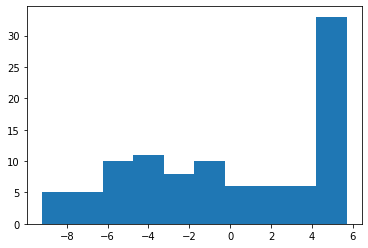

In [116]:
samples = my_kappa(100, 810196569)
a=plt.hist(samples, bins=10)

**B) Calculate and print the mean of the sample you've just drawn.**

In [104]:
sample_mean = samples.mean()
print("Sample mean is: {0:0.3f}".format(sample_mean))

Sample mean is: 0.455


**C) Calculate the *unbiased estimation* of the standard deviation of your sample.**

In [105]:
sample_std = np.sqrt(samples.var(ddof=1)) 
print("Sample standard deviation is: {0:0.3f}".format(sample_std))

Sample standard deviation is: 4.318


The sample standard deviation is a biased estimator it can be mathematically proved. For having unbiased estimation n-1 should be used rather than n in the denominator.

**D) Answer the following questions.**
- What is an unbiased estimator?
- In what situations the maximum likelihood estimation of the variance of a distribution can severely contaminate the estimation?

~ Type your answer here ...

1) An unbiased estimator is an estimator that its expected value is equal to true value of the parameter. That is mean that the estimator is on average correct. For finite amounts of data the estimated parameter is unlikely to have the true value. A good estimator has the equal chances of over- and underestimation of the true value. Such an estimator is unbiased.
$$ E(x)= x $$



2) 
- The maximum likelihood estimation for variance is a biased estimation, and it doesn't work well for a small number of data points (for large N it becomes unbiased). The sample size has a significant effect on sample variance. As the number of samples increases, we have a better estimation of the mean and get a more accurate variance. Mathematically can be shown as the number of samples increases sample variance coverage to population variance. For a low number of samples, the mean can behave very erratically, darting around μ because it is sensitive to a very large or very small number. By increasing the sample size, the effect of each datapoint decrease, and mean is more accurate.
 
- Also, the MLE presumed that the random variable comes from a known distribution(normal). This assumption may hugely influence our estimation if the assumed distribution of data was not correct.

**E) Now, draw 2000 samples of size 100 and store their means in an array You're going to use this array in the next questions.**

In [106]:
all_samples = np.zeros((2000,100))
all_means = np.zeros((2000,1))
for i in range(2000):
    smpl = my_kappa(100, 810196569) 
    all_samples[i,:] = smpl
    all_means[i,0] = smpl.mean()

# Problem #2 - Data Visualization and CLT

**A) Draw a sample of size 2000 from my_kappa distribution. Then, using matplotlib package, depict the histogram of your sample.**

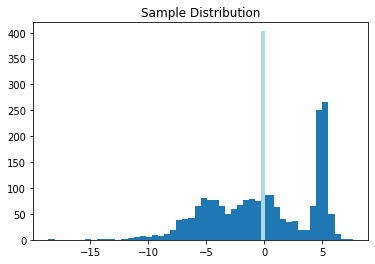

In [113]:
smpl_2000 = my_kappa(2000, 810196569)
mu = smpl_2000.mean()
a = plt.hist(smpl_2000, bins=50)
plt.plot([mu,mu], [0,400], '-k', lw=4, color='lightblue')
plt.title("Sample Distribution")
plt.show()

**B) Now, plot the histogram of the sample means you've calculate in problem 1 part E.**

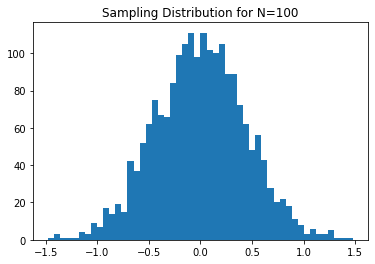

In [114]:
a = plt.hist(all_means, bins=50)
plt.title("Sampling Distribution for N=100")
plt.show()

**C) Considering the 2000 realizations of the sample means distribution you've calculated in problem 1 part E, compute their mean and standard deviation.**

In [109]:
mean_of_sample_means = all_means.mean()
std_of_sample_means = np.sqrt(all_means.var(ddof=1))#unbiased
print("Mean of sample means is: {0:0.3f}".format(mean_of_sample_means))
print("standard deviation of sample means is: {0:0.3f}".format(std_of_sample_means))

Mean of sample means is: 0.001
standard deviation of sample means is: 0.439


**D) Answer the following questions.**
- What do you think is the main characteristic of the second histogram?
- Interpret the results of part C. Do these results have any association with your estimation of the mean of my_kappa distribution? Explain.

~Type your answer here ...

1) The sampling distribution has a normal characteristic. The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of samples will be approximately normally distributed.


2) As the mean is an unbiased estimator, the mean of sample distribution converges to the real mean. Also, sampling distribution has a real mean of the distribution, as a result they are approximately equal. Cause we don't know the real variance, we use sample variance as estimation of population variance, and we see the sampling distribution has 100 times (size of each sampling set) smaller variance as we expected.

# Problem #3 - Confidence Interval

**A) Construct a 95% confidence interval on the sample means of my_kappa distribution. Your result, obviously, consists of two numbers: a lower bound and an upper bound of the calculated interval.**

In [122]:
Sampling_mean_sd = sample_std/np.sqrt(100)#estimated sampling means standard deviation
ratio = stats.norm.ppf((1+.95)/2)
confidence = ratio * Sampling_mean_sd
upper_bound = mean_of_sample_means + confidence
lower_bound = mean_of_sample_means - confidence
#-.0196 +- 1.96*.041

Upper bound is:  0.847
Lower bound is: -0.846


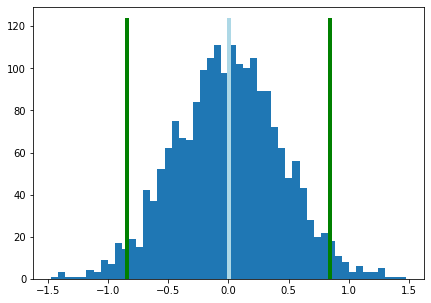

In [111]:
plt.figure(figsize=(7, 5))
a = plt.hist(all_means, bins=50)
plt.plot([mean_of_sample_means,mean_of_sample_means], [0,123], '-k', lw=4, color='lightblue')
plt.plot([upper_bound,upper_bound], [0,123], '-k', lw=4, color='green')
plt.plot([lower_bound,lower_bound], [0,123], '-k', lw=4, color='green')
print("Upper bound is:  {0:0.3f}".format(upper_bound))#this is two sided confidence
print("Lower bound is: {0:0.3f}".format(lower_bound))

**B) What does this interval mean?**

It means that with 95% confidence and certainty, the real mean of population distribution exists in this interval.

# Problem #4 - Estimating The Parameters of Some Observations

**In this problem, you're going to estimate the average of a random variable. In contrast with previous problems, this time the observations are collected one by one. To observe a single realization of this random variable, call `my_omicron(student_id)` function. Upon calling this function, a single observation/realization of this random variable is returned.**

**A) Draw 100 samples from my_omicron distribution. After observing each realization, calculate the sample mean of the realizations you've observed so far. In addition to that, construct a confidence interval for your estimation at 0.1 significane level. Finally, plot your estimations in a bar plot alongside their confidence errors as whisckers of each bar. Your final plot should be similar to this:**

<img src="https://support.content.office.net/en-us/media/68efe29e-f30c-4c6f-95cf-9cff7dde1131.jpg" width="400px" alt="no internet connection!">

In [123]:
ratio = stats.norm.ppf((1+.90)/2)

samples = []
means = np.zeros((100,1))
confidence = np.zeros((100,1))
for i in range(100):
    samples.append(my_omicron(810196569))
    smpl = np.array(samples)
    means[i,0] = smpl.mean()
    if(i == 0):
        sigma = np.sqrt(smpl.var(ddof=0)/i+1)
    else:
        sigma = np.sqrt(smpl.var(ddof=1)/i+1)
        
    confidence[i,0] = 2 * sigma * ratio

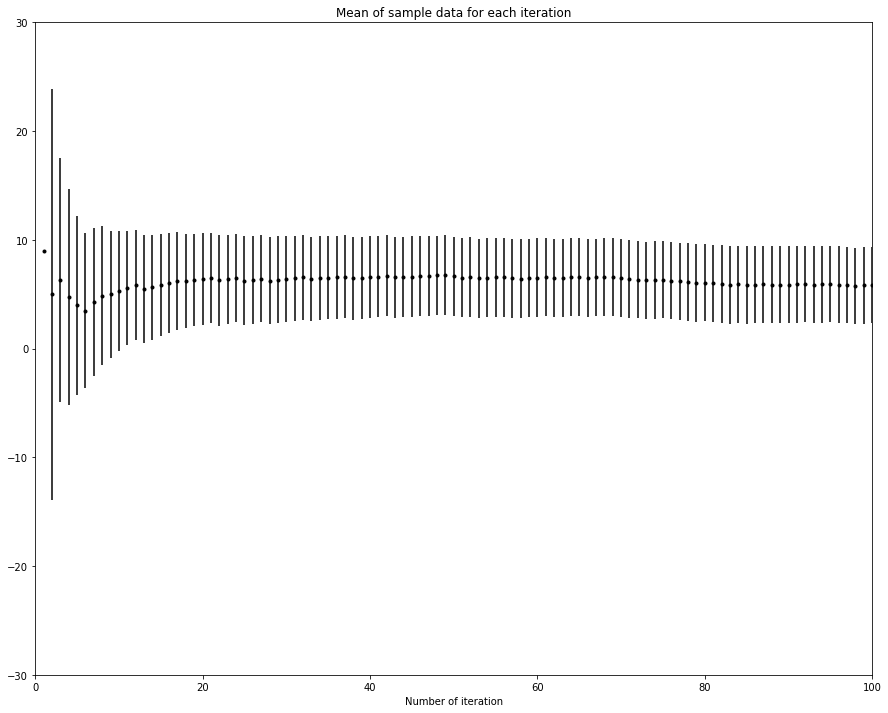

In [124]:
x = list(range(1,101))
plt.figure(figsize=(15, 12))
plt.title("Mean of sample data for each iteration")
plt.xlabel("Number of iteration")
plt.xlim(0, 100)
plt.ylim(-30, 30)
plt.errorbar(x, means, yerr=confidence, fmt='.k')
plt.show(block=False)

**B) How is your estimation changing over time? How is your confidence interval changing? Explain why.**

As the number of samples increases, the confidence boundary decreases dramatically until its change rate becomes small.
Because we have a few data points at first that might be too far from each other, so the standard deviation becomes big. As we know, standard deviation of sampling mean directly relates to standard deviation sample distribution and reverse relation with sample size. So at first, we see big intervals, and it becomes smaller after a good number of iterations because for large sample size, the effect of fluctuations lessens. 

~ For a large number of N, we see the probability constrained more and more near the mean, and the variance of sampling distribution become small. 